In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler

In [6]:
#Loading Data
train = pd.read_csv("train.csv")
train.name = 'train'
test = pd.read_csv("test.csv")
test.name = 'test'
submission = pd.read_csv("sample_submission.csv")
submission.name = 'submission'


In [7]:
train.head()

EmpID  EmpName LanguageOfCommunication  Age  Gender  \
0  11041     John                 English   35    Male   
1  15079  William                 English   26    Male   
2  18638    James                 English   36  Female   
3   3941  Charles                 English   29  Female   
4   5936   George                 English   25    Male   

  JobProfileIDApplyingFor HighestDegree             DegreeBranch  \
0                 JR85289        B.Tech               Electrical   
1                 JR87525        B.Tech  Artificial Intelligence   
2                 JR87525           PhD         Computer Science   
3                 JR87525           BCA   Information Technology   
4                 JR70175   Dual M.Tech         Computer Science   

  GraduatingInstitute  LatestDegreeCGPA  ...  CurrentCTC  ExpectedCTC  \
0              Tier 1                 7  ...          21           26   
1              Tier 3                 7  ...          15           19   
2              Tier 1                 6  ...          15           24   
3              Tier 2                 5  ...          16           24   
4              Tier 3                 8  ...          24           32   

   MartialStatus  EmpScore CurrentDesignation  CurrentCompanyType  \
0        Married         5                SSE          Enterprise   
1        Married         5                 BA            MidSized   
2         Single         5                SDE            MidSized   
3        Married         5                SDE             Startup   
4        Married         5                SDE          Enterprise   

  DepartmentInCompany TotalLeavesTaken BiasInfluentialFactor  FitmentPercent  
0              Design               20      YearsOfExperince           95.40  
1         Engineering                6                   NaN           67.09  
2         Engineering               19                Gender           91.26  
3             Product               16                Gender           72.29  
4         Engineering               10          DegreeBranch           86.34  

[5 rows x 22 columns]

In [8]:
test.head()

EmpID  EmpName LanguageOfCommunication  Age  Gender  \
0   5664     Theo                  Native   35    Male   
1  23568   Vernie                 English   35    Male   
2  21490  Wendell                 English   28    Male   
3   8363     West                   Hindi   37    Male   
4   6165   Alford                   Hindi   36  Female   

  JobProfileIDApplyingFor HighestDegree             DegreeBranch  \
0                 JR85289           PhD   Information Technology   
1                 JR85289        B.Tech   Information Technology   
2                 JR87525        M.Tech  Artificial Intelligence   
3                 JR87525            MS         Computer Science   
4                 JR85289           PhD  Artificial Intelligence   

  GraduatingInstitute  LatestDegreeCGPA  YearsOfExperince  GraduationYear  \
0              Tier 2                 5                 5            2016   
1              Tier 3                 9                12            2009   
2              Tier 2                 9                 2            2019   
3              Tier 2                 8                11            2010   
4              Tier 2                 7                 6            2015   

   CurrentCTC  ExpectedCTC MartialStatus  EmpScore CurrentDesignation  \
0          27           34        Single         4                SDE   
1          29           33       Married         4                 EM   
2          18           25       Married         3                SDE   
3           7           12        Single         5                 DS   
4          22           32       Married         4                SDE   

  CurrentCompanyType DepartmentInCompany  TotalLeavesTaken  
0         Enterprise             Finance                18  
1         Enterprise         Engineering                 8  
2            Startup         Engineering                18  
3         Enterprise             Product                17  
4            Startup         Engineering                 9

In [9]:
submission.head()

EmpID BiasInfluentialFactor  FitmentPercent
0   5664         MaritalStatus           25.14
1  23568          DegreeBranch           91.44
2  21490         MartialStatus           76.92
3   8363         HighestDegree           77.92
4   6165                Gender           85.64

### 1. EDA

In [85]:
def display_unique(data):
    for column in data.columns :
        if data[column].dtype == "object":
            print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
            print(data[column].value_counts())
            print("")


In [86]:
def display_dataFrame_info(data):
    print("Information of",data.name,"\n")
    print("No of Rows: ",data.shape[0])
    print("No of Columns: ",data.shape[1],"\n")
    print("Data Type Count:")
    print(data.dtypes.value_counts(),"\n")
    print(data.info(),"\n")
    display(data.describe())
    display(data.describe( include = "object"))
    
    tab_info = pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
    tab_info = tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values'}))
    tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'null values (%)'}))
    
    display(tab_info)
    display_unique(data)
    

In [87]:
display_dataFrame_info(train)

Information of train 

No of Rows:  13645
No of Columns:  22 

Data Type Count:
object     12
int64       9
float64     1
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64 

EmpID           Age  LatestDegreeCGPA  YearsOfExperince  \
count  13645.000000  13645.000000      13645.000000      13645.000000   
mean   13150.781239     30.691242          7.100257          6.547746   
std     6475.019626      3.881378          1.346539          3.426920   
min     2001.000000     24.000000          4.000000          1.000000   
25%     7501.000000     28.000000          6.000000          4.000000   
50%    13173.000000     31.000000          7.000000          7.000000   
75%    18718.000000     34.000000          8.000000          9.000000   
max    24390.000000     42.000000         10.000000         12.000000   

       GraduationYear    CurrentCTC   ExpectedCTC      EmpScore  \
count    13645.000000  13645.000000  13645.000000  13645.000000   
mean      2014.452254     18.076951     25.061488      3.392085   
std          3.426920      7.208130      7.478119      1.044676   
min       2009.000000      6.000000     10.000000      1.000000   
25%       2012.000000     12.000000     19.000000      3.000000   
50%       2014.000000     18.000000     25.000000      3.000000   
75%       2017.000000     24.000000     31.000000      4.000000   
max       2020.000000     30.000000     40.000000      5.000000   

       TotalLeavesTaken  FitmentPercent  
count      13645.000000    13645.000000  
mean          11.967021       75.880093  
std            4.897836       14.894207  
min            4.000000       33.530000  
25%            8.000000       68.720000  
50%           12.000000       78.110000  
75%           16.000000       87.990000  
max           20.000000       95.500000

EmpName LanguageOfCommunication Gender JobProfileIDApplyingFor  \
count     13645                   13645  13645                   13645   
unique     1766                       3      3                       9   
top     Francis                 English   Male                 JR85289   
freq         14                    7510   8376                    4697   

       HighestDegree      DegreeBranch GraduatingInstitute MartialStatus  \
count          13645             13645               13645         13645   
unique             8                 6                   3             2   
top           B.Tech  Computer Science              Tier 2       Married   
freq            5619              4749                6092          9810   

       CurrentDesignation CurrentCompanyType DepartmentInCompany  \
count               13645              13645               13645   
unique                  8                  3                   5   
top                   SDE            Startup         Engineering   
freq                 5423               6373                5749   

       BiasInfluentialFactor  
count                  10309  
unique                     9  
top             DegreeBranch  
freq                    2858

EmpID EmpName LanguageOfCommunication    Age  Gender  \
column type      int64  object                  object  int64  object   
null values          0       0                       0      0       0   
null values (%)      0       0                       0      0       0   

                JobProfileIDApplyingFor HighestDegree DegreeBranch  \
column type                      object        object       object   
null values                           0             0            0   
null values (%)                       0             0            0   

                GraduatingInstitute LatestDegreeCGPA  ... CurrentCTC  \
column type                  object            int64  ...      int64   
null values                       0                0  ...          0   
null values (%)                   0                0  ...          0   

                ExpectedCTC MartialStatus EmpScore CurrentDesignation  \
column type           int64        object    int64             object   
null values               0             0        0                  0   
null values (%)           0             0        0                  0   

                CurrentCompanyType DepartmentInCompany TotalLeavesTaken  \
column type                 object              object            int64   
null values                      0                   0                0   
null values (%)                  0                   0                0   

                BiasInfluentialFactor FitmentPercent  
column type                    object        float64  
null values                      3336              0  
null values (%)               24.4485              0  

[3 rows x 22 columns]

No of Unique Values in EmpName Column are : 1766
Francis    14
Lucian     14
Arnold     14
Roy        14
Burl       14
           ..
Fed         1
Needham     1
Marrion     1
Gilford     1
Polk        1
Name: EmpName, Length: 1766, dtype: int64

No of Unique Values in LanguageOfCommunication Column are : 3
English    7510
Hindi      4733
Native     1402
Name: LanguageOfCommunication, dtype: int64

No of Unique Values in Gender Column are : 3
Male      8376
Female    4326
Other      943
Name: Gender, dtype: int64

No of Unique Values in JobProfileIDApplyingFor Column are : 9
JR85289    4697
JR87525    3416
JR88879    1231
JR89890    1157
JR88873    1123
JR81165     681
JR79193     678
JR88654     420
JR70175     242
Name: JobProfileIDApplyingFor, dtype: int64

No of Unique Values in HighestDegree Column are : 8
B.Tech         5619
M.Tech         2026
BCA            1634
MS             1579
Dual M.Tech    1358
Dual MBA        665
PhD             624
MCA             140
Name: HighestDegre

In [88]:
display_dataFrame_info(test)

Information of test 

No of Rows:  8745
No of Columns:  20 

Data Type Count:
object    11
int64      9
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpID                    8745 non-null   int64 
 1   EmpName                  8745 non-null   object
 2   LanguageOfCommunication  8745 non-null   object
 3   Age                      8745 non-null   int64 
 4   Gender                   8745 non-null   object
 5   JobProfileIDApplyingFor  8745 non-null   object
 6   HighestDegree            8745 non-null   object
 7   DegreeBranch             8745 non-null   object
 8   GraduatingInstitute      8745 non-null   object
 9   LatestDegreeCGPA         8745 non-null   int64 
 10  YearsOfExperince         8745 non-null   int64 
 11  GraduationYear           8745 non-null   int64 
 12  CurrentCTC               87

EmpID          Age  LatestDegreeCGPA  YearsOfExperince  \
count   8745.000000  8745.000000       8745.000000       8745.000000   
mean   13265.275586    30.675472          7.111378          6.464608   
std     6445.441612     3.934141          1.338240          3.458010   
min     2007.000000    24.000000          4.000000          1.000000   
25%     7762.000000    28.000000          6.000000          3.000000   
50%    13226.000000    31.000000          7.000000          6.000000   
75%    18887.000000    34.000000          8.000000          9.000000   
max    24388.000000    42.000000         10.000000         12.000000   

       GraduationYear   CurrentCTC  ExpectedCTC     EmpScore  TotalLeavesTaken  
count     8745.000000  8745.000000  8745.000000  8745.000000       8745.000000  
mean      2014.535392    18.019325    25.029846     3.388222         11.925214  
std          3.458010     7.154050     7.413648     1.057420          4.928806  
min       2009.000000     6.000000    10.000000     1.000000          4.000000  
25%       2012.000000    12.000000    19.000000     3.000000          8.000000  
50%       2015.000000    18.000000    25.000000     3.000000         12.000000  
75%       2018.000000    24.000000    31.000000     4.000000         16.000000  
max       2020.000000    30.000000    40.000000     5.000000         20.000000

EmpName LanguageOfCommunication Gender JobProfileIDApplyingFor  \
count     8745                    8745   8745                    8745   
unique    1566                       3      3                       9   
top      Helen                 English   Male                 JR85289   
freq        10                    4771   5405                    3011   

       HighestDegree      DegreeBranch GraduatingInstitute MartialStatus  \
count           8745              8745                8745          8745   
unique             8                 6                   3             2   
top           B.Tech  Computer Science              Tier 2       Married   
freq            3497              3024                4033          6307   

       CurrentDesignation CurrentCompanyType DepartmentInCompany  
count                8745               8745                8745  
unique                  8                  3                   5  
top                   SDE            Startup         Engineering  
freq                 3412               3971                3682

EmpID EmpName LanguageOfCommunication    Age  Gender  \
column type      int64  object                  object  int64  object   
null values          0       0                       0      0       0   
null values (%)      0       0                       0      0       0   

                JobProfileIDApplyingFor HighestDegree DegreeBranch  \
column type                      object        object       object   
null values                           0             0            0   
null values (%)                       0             0            0   

                GraduatingInstitute LatestDegreeCGPA YearsOfExperince  \
column type                  object            int64            int64   
null values                       0                0                0   
null values (%)                   0                0                0   

                GraduationYear CurrentCTC ExpectedCTC MartialStatus EmpScore  \
column type              int64      int64       int64        object    int64   
null values                  0          0           0             0        0   
null values (%)              0          0           0             0        0   

                CurrentDesignation CurrentCompanyType DepartmentInCompany  \
column type                 object             object              object   
null values                      0                  0                   0   
null values (%)                  0                  0                   0   

                TotalLeavesTaken  
column type                int64  
null values                    0  
null values (%)                0

No of Unique Values in EmpName Column are : 1566
Helen        10
Ronald       10
Dewey        10
Wendell      10
Wilfred       9
             ..
Elva          1
Lovell        1
Edson         1
Arlington     1
Seldon        1
Name: EmpName, Length: 1566, dtype: int64

No of Unique Values in LanguageOfCommunication Column are : 3
English    4771
Hindi      3088
Native      886
Name: LanguageOfCommunication, dtype: int64

No of Unique Values in Gender Column are : 3
Male      5405
Female    2697
Other      643
Name: Gender, dtype: int64

No of Unique Values in JobProfileIDApplyingFor Column are : 9
JR85289    3011
JR87525    2196
JR88879     802
JR88873     725
JR89890     719
JR79193     439
JR81165     420
JR88654     259
JR70175     174
Name: JobProfileIDApplyingFor, dtype: int64

No of Unique Values in HighestDegree Column are : 8
B.Tech         3497
M.Tech         1329
BCA            1072
MS             1046
Dual M.Tech     854
PhD             461
Dual MBA        407
MCA             

In [550]:
from quickda.explore_data import *
explore(train)

dtypes  count  null_sum  null_pct  nunique    min  \
Age                        int64  13645         0     0.000       19     24   
BiasInfluentialFactor     object  10309      3336     0.244        9      -   
CurrentCTC                 int64  13645         0     0.000       25      6   
CurrentCompanyType         int32  13645         0     0.000        3      0   
CurrentDesignation         int32  13645         0     0.000        8      0   
DegreeBranch               int32  13645         0     0.000        6      0   
DepartmentInCompany        int32  13645         0     0.000        5      0   
EmpID                     object  13645         0     0.000    13645   2001   
EmpScore                 float64  13645         0     0.000        5    1.5   
ExpectedCTC                int64  13645         0     0.000       31     10   
FitmentPercent           float64  13645         0     0.000     4578  33.53   
Gender                     int32  13645         0     0.000        3      0   
GraduatingInstitute        int32  13645         0     0.000        3      0   
GraduationYear             int64  13645         0     0.000       12   2009   
HighestDegree              int32  13645         0     0.000        8      0   
JobProfileIDApplyingFor    int32  13645         0     0.000        9      0   
LanguageOfCommunication    int32  13645         0     0.000        3      0   
LatestDegreeCGPA           int64  13645         0     0.000        7      4   
MartialStatus              int32  13645         0     0.000        2      0   
TotalLeavesTaken           int64  13645         0     0.000       17      4   
YearsOfExperince           int64  13645         0     0.000       12      1   

                           25%    50%    75%    max      mean median  \
Age                         28     31     34     42   30.6912     31   
BiasInfluentialFactor        -      -      -      -         -      -   
CurrentCTC                  12     18     24     30    18.077     18   
CurrentCompanyType           0      1      2      2   1.14496      1   
CurrentDesignation           3      5      5      7   4.33309      5   
DegreeBranch                 1      2      4      5   2.29505      2   
DepartmentInCompany          1      2      2      4   1.67988      2   
EmpID                        -      -      -  24390         -      -   
EmpScore                     3      3      4      5   3.42543      3   
ExpectedCTC                 19     25     31     40   25.0615     25   
FitmentPercent           68.72  78.11  87.99   95.5   75.8801  78.11   
Gender                       0      1      1      2   0.75207      1   
GraduatingInstitute          0      1      1      2  0.851008      1   
GraduationYear            2012   2014   2017   2020   2014.45   2014   
HighestDegree                0      1      4      7   2.12466      1   
JobProfileIDApplyingFor      3      4      6      8   4.14115      4   
LanguageOfCommunication      0      0      1      2  0.552364      0   
LatestDegreeCGPA             6      7      8     10   7.10026      7   
MartialStatus                0      0      1      1  0.281055      0   
TotalLeavesTaken             8     12     16     20    11.967     12   
YearsOfExperince             4      7      9     12   6.54775      7   

                              std         skew  
Age                       3.88138     0.162296  
BiasInfluentialFactor           -            -  
CurrentCTC                7.20813    -0.010166  
CurrentCompanyType       0.876468    -0.285429  
CurrentDesignation        2.13103    -0.761778  
DegreeBranch              1.83011     0.397575  
DepartmentInCompany       1.04515     0.537067  
EmpID                           -            -  
EmpScore                 0.973328    -0.103272  
ExpectedCTC               7.47812  0.000442384  
FitmentPercent            14.8942    -0.966175  
Gender                   0.569828    0.0475906  
GraduatingInstitute      0.728956     0.237075  
GraduationYear  

In [89]:
def dattypechange(data): 
    data['EmpID'] = data['EmpID'].astype('object')
dattypechange(train)
dattypechange(test)

### 2. Outlier detection and treatment

<AxesSubplot:xlabel='TotalLeavesTaken'>

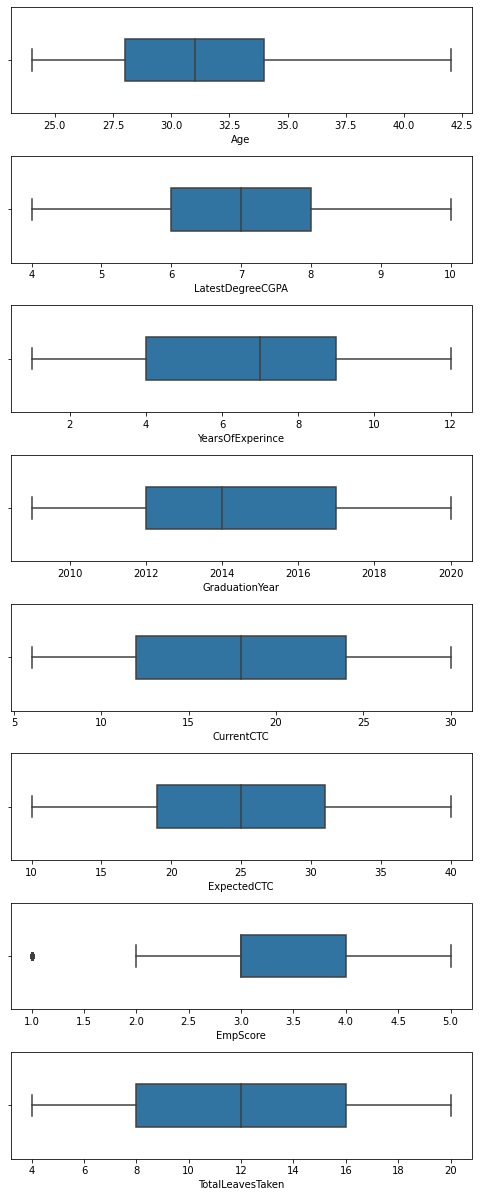

In [91]:
fig,axes = plt.subplots(8,1, figsize=(8,20)) #subplots(no of rows, no of columns)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
sns.boxplot(x='Age',data=train, ax= axes[0], width=0.4)
sns.boxplot(x='LatestDegreeCGPA',data=train, ax= axes[1], width=0.4)
sns.boxplot(x='YearsOfExperince',data=train, ax= axes[2], width=0.4)
sns.boxplot(x='GraduationYear',data=train, ax= axes[3], width=0.4)
sns.boxplot(x='CurrentCTC',data=train, ax= axes[4], width=0.4)
sns.boxplot(x='ExpectedCTC',data=train, ax= axes[5], width=0.4)
sns.boxplot(x='EmpScore',data=train, ax= axes[6], width=0.4)
sns.boxplot(x='TotalLeavesTaken',data=train, ax= axes[7], width=0.4)


In [92]:
q1 = train["EmpScore"].quantile(0.25)
q3 = train["EmpScore"].quantile(0.75)
iqr = q3-q1
u_limit = q3 +1.5*iqr
l_limit  = q1 -1.5*iqr 
train["EmpScore"] = np.where(train["EmpScore"] < l_limit, l_limit, train["EmpScore"])

<AxesSubplot:xlabel='EmpScore'>

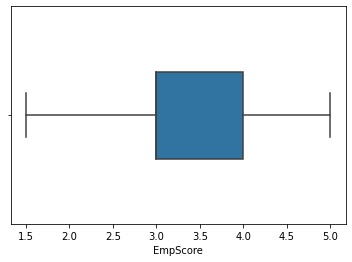

In [93]:
plt.figsize=(4,9)
sns.boxplot(x='EmpScore',data=train, width=0.4)

### 3. duplicates treatment

In [94]:
def duplicates(data):
    print("No of duplicate :", data.duplicated().sum())
    print("% of duplicate :", (data.duplicated().sum()/len(data))*100)

print("In train")
duplicates(train)

print("\n\nIn test ")
duplicates(test)

In train
No of duplicate : 0
% of duplicate : 0.0


In test 
No of duplicate : 0
% of duplicate : 0.0


In [95]:
def drop_column_Name(data, col):
    data.drop(col, axis=1, inplace = True )

col = ['EmpName']
drop_column_Name(train, col)
drop_column_Name(test, col)

### 4. Encoding categorical variabes

In [96]:
from sklearn import preprocessing

def data_encoding(encoding_strategy , train_data, test_data , encoding_columns):
        if encoding_strategy == "LabelEncoding":
            print("LabelEncoding...")  
            for column in encoding_columns :
                print("column",column )
                Encoder = preprocessing.LabelEncoder()
                Encoder.fit(train_data[column])
                train_data[column] = Encoder.fit_transform(train_data[column])
                test_data[column] = Encoder.fit_transform(test_data[column])
            
        elif encoding_strategy == "OneHotEncoding":
            print("ELIF OneHotEncoding")
            for column in encoding_columns :
                print("column",column )
                
                df = pd.get_dummies(train_data[column])
                train_data = pd.concat([train_data,df],axis = 1)
                train_data.drop(column, axis=1, inplace = True)
                
                df = pd.get_dummies(test_data[column])
                test_data = pd.concat([test_data,df],axis = 1)
                test_data.drop(column, axis=1, inplace = True)
                
            del df   
            #for column in data.columns : #do it
        return train_data, test_data
        
encoding_strategy = ['LabelEncoding', 'OneHotEncoding']  
encoding_columns = ['LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor', 'HighestDegree',
                   'DegreeBranch', 'GraduatingInstitute','MartialStatus','CurrentDesignation','CurrentCompanyType','DepartmentInCompany']
train_data, test_data = data_encoding(encoding_strategy[0], train, test, encoding_columns)                                                                                


LabelEncoding...
column LanguageOfCommunication
column Gender
column JobProfileIDApplyingFor
column HighestDegree
column DegreeBranch
column GraduatingInstitute
column MartialStatus
column CurrentDesignation
column CurrentCompanyType
column DepartmentInCompany


In [29]:
def bias_labeler(data): #To encode BiasInfluentialFactor
    data["BiasInfluentialFactor"] = data["BiasInfluentialFactor"].replace({'DegreeBranch':0,
                                        'Gender':1,'YearsOfExperince':2,'CurrentCompanyType':3,
                                        'EmpScore':4, 'HighestDegree':5, 'Ethinicity':6,
                                        'MartialStatus':7, 'LatestDegreeCGPA':8})
    

In [30]:
def bias_delabeler(data): #To decode BiasInfluentialFactor
        data["BiasInfluentialFactor"] = data["BiasInfluentialFactor"].replace({0:'DegreeBranch',
                                        1:'Gender', 2:'YearsOfExperince', 3:'CurrentCompanyType',
                                        4:'EmpScore', 5:'HighestDegree', 6:'Ethinicity',
                                        7:'MartialStatus', 8:'LatestDegreeCGPA'})

### 4.1 Analyzing missing vaules

In [100]:
train_data.isnull().sum()[(train_data.isnull().sum() >0) == True ]

BiasInfluentialFactor    3336
dtype: int64

In [101]:
(train_data.isnull().sum()/train_data.shape[0]) *100

EmpID                       0.000000
LanguageOfCommunication     0.000000
Age                         0.000000
Gender                      0.000000
JobProfileIDApplyingFor     0.000000
HighestDegree               0.000000
DegreeBranch                0.000000
GraduatingInstitute         0.000000
LatestDegreeCGPA            0.000000
YearsOfExperince            0.000000
GraduationYear              0.000000
CurrentCTC                  0.000000
ExpectedCTC                 0.000000
MartialStatus               0.000000
EmpScore                    0.000000
CurrentDesignation          0.000000
CurrentCompanyType          0.000000
DepartmentInCompany         0.000000
TotalLeavesTaken            0.000000
BiasInfluentialFactor      24.448516
FitmentPercent              0.000000
dtype: float64

### 4.2 Mutual information estimation

In [106]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
# determine the mutual information
c = train_data.dropna()
bias_labeler(c)
a = c .drop(["FitmentPercent"], axis = 1)
b = c ["FitmentPercent"]

mutual_info = pd.Series(mutual_info_regression(a,b))
mutual_info.index = a.columns
mutual_info.sort_values(ascending=False)

<ipython-input-29-bcaada5fa73f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BiasInfluentialFactor"] = data["BiasInfluentialFactor"].replace({'DegreeBranch':0,


BiasInfluentialFactor      0.306792
CurrentCompanyType         0.098293
Gender                     0.075552
CurrentCTC                 0.035082
EmpScore                   0.029798
LatestDegreeCGPA           0.028635
ExpectedCTC                0.024199
YearsOfExperince           0.015490
GraduationYear             0.014925
Age                        0.010821
HighestDegree              0.007581
DegreeBranch               0.007267
MartialStatus              0.005326
CurrentDesignation         0.003496
EmpID                      0.003361
LanguageOfCommunication    0.003109
TotalLeavesTaken           0.000000
GraduatingInstitute        0.000000
JobProfileIDApplyingFor    0.000000
DepartmentInCompany        0.000000
dtype: float64

<AxesSubplot:>

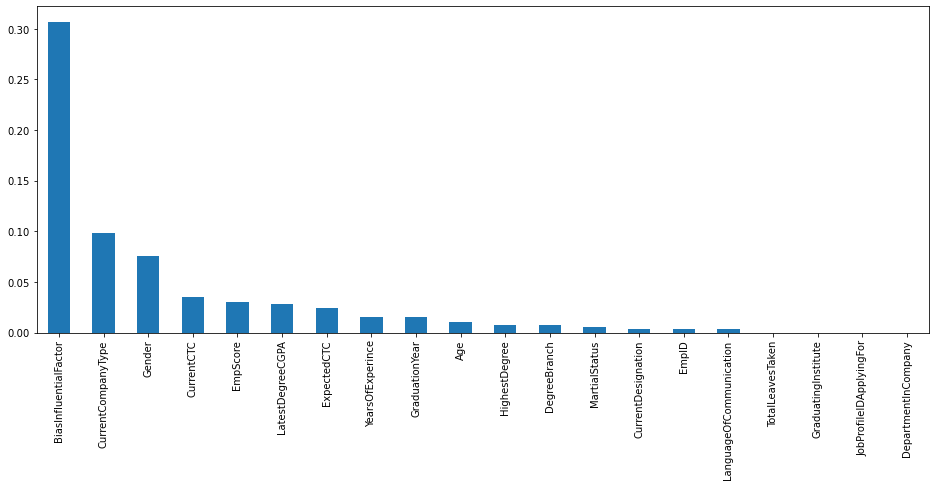

In [107]:
#plot mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16, 6))

### 4.3 Correlation matrix

<AxesSubplot:>

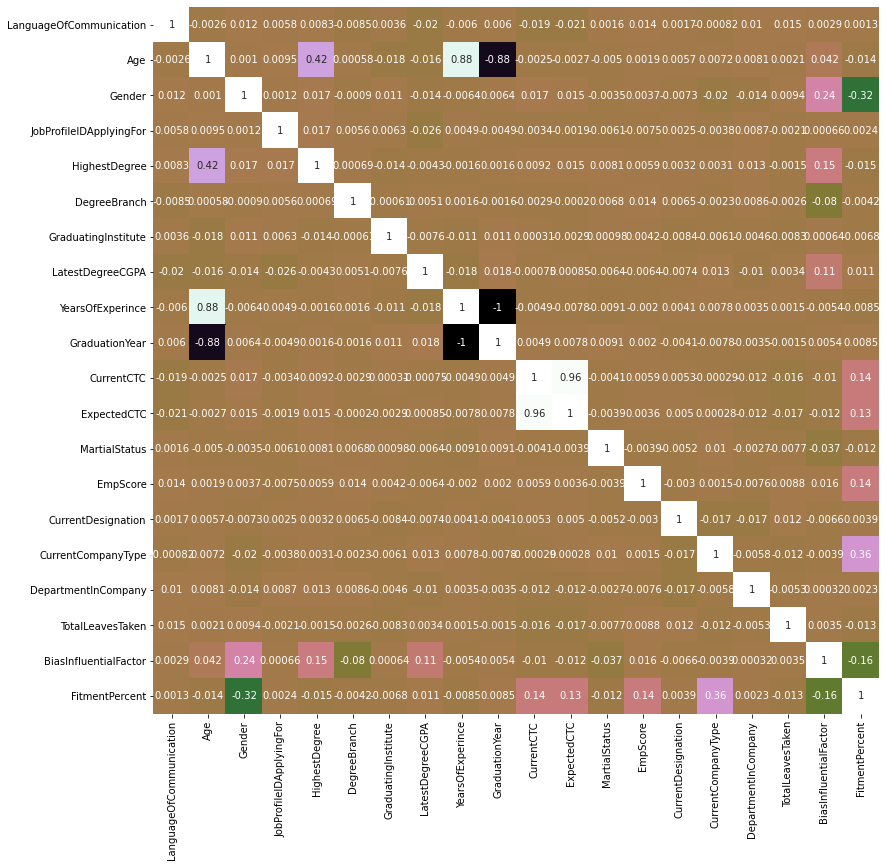

In [78]:
plt.figure(1, figsize=(13,13))
sns.heatmap(train.corr(),cmap="cubehelix", annot=True, cbar=False)

.  
#### Observations:
1. since dataset is small droping na values is not an option.
2. Feature selection techniques show that BiasinfuentialFactor is an important feature for FitmentPercent
3. tried putting them as "na" i.e a new category but classification f1 score didn't go above 80 by all means.  
#### Asumption:
1. everyone has some kind of bias and missing values are to be filled with probable bias.  
#### Task:
1. Build classifier to classify bias 
2. Fill nan values using classifier.
3. Create new column in test test data as "BiasInfluentialFactor".
3. Build regression model to predict FitmentPercent.

### 5. Building Classifier
##### 5.1 data Prepration

In [466]:
#set to be classified
missing_biasInfo = train_data[train_data.isnull().any(axis=1)]

#train set for classification
with_biasInfo = train_data.dropna()


<function matplotlib.pyplot.show(close=None, block=None)>

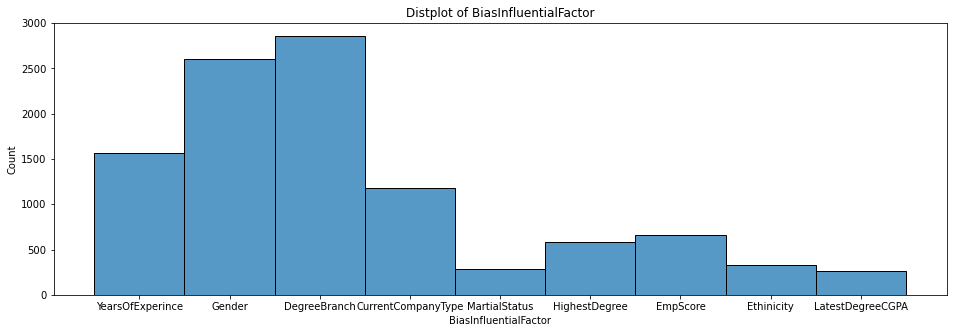

In [268]:
plt.figure(1, figsize=(16,5))
plt.subplot()
plt.subplots_adjust(hspace  = 1, wspace = 1)
sns.histplot(with_biasInfo["BiasInfluentialFactor"])
plt.title('Distplot of {}'.format("BiasInfluentialFactor"))
plt.show

In [269]:
bias_labeler(with_biasInfo)

<ipython-input-29-bcaada5fa73f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BiasInfluentialFactor"] = data["BiasInfluentialFactor"].replace({'DegreeBranch':0,


####  5.2 Feature engineering and Feature selection 

In [420]:
x_train_classifier = with_biasInfo.drop(["BiasInfluentialFactor"], axis = 1)
y_train_classifier = with_biasInfo["BiasInfluentialFactor"]
test_data_copy = test_data.copy()

In [271]:
mutual_info = pd.Series(mutual_info_classif(x_train_classifier,y_train_classifier))
mutual_info.index = x_train_classifier.columns
mutual_info.sort_values(ascending=False)

Gender                     0.402894
FitmentPercent             0.303908
DegreeBranch               0.270188
GraduationYear             0.263746
YearsOfExperince           0.251381
Age                        0.205032
CurrentCompanyType         0.198590
HighestDegree              0.169148
EmpScore                   0.117267
CurrentCTC                 0.091574
ExpectedCTC                0.053270
LatestDegreeCGPA           0.051101
GraduatingInstitute        0.011152
MartialStatus              0.009468
CurrentDesignation         0.004569
TotalLeavesTaken           0.001515
JobProfileIDApplyingFor    0.000000
DepartmentInCompany        0.000000
LanguageOfCommunication    0.000000
EmpID                      0.000000
dtype: float64

<AxesSubplot:>

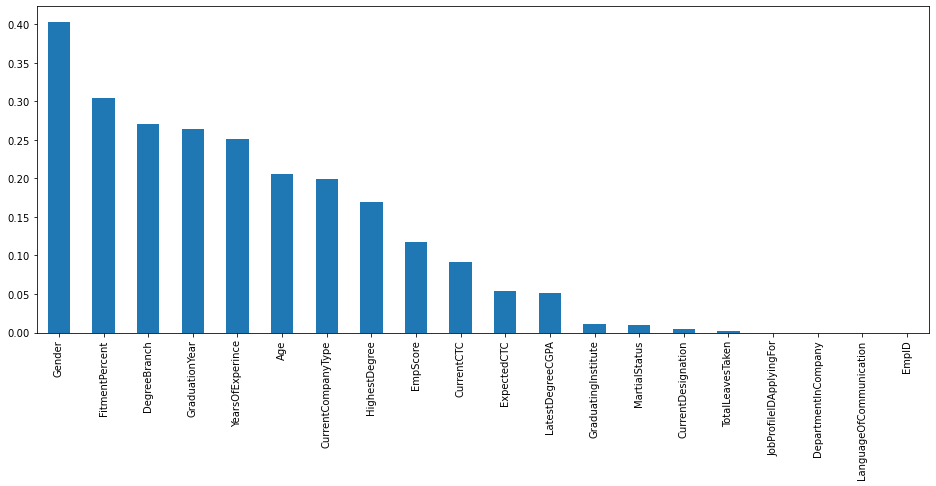

In [272]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16, 6))

In [273]:
c = x_train_classifier.copy()
c["BiasInfluentialFactor"] = y_train_classifier

<AxesSubplot:>

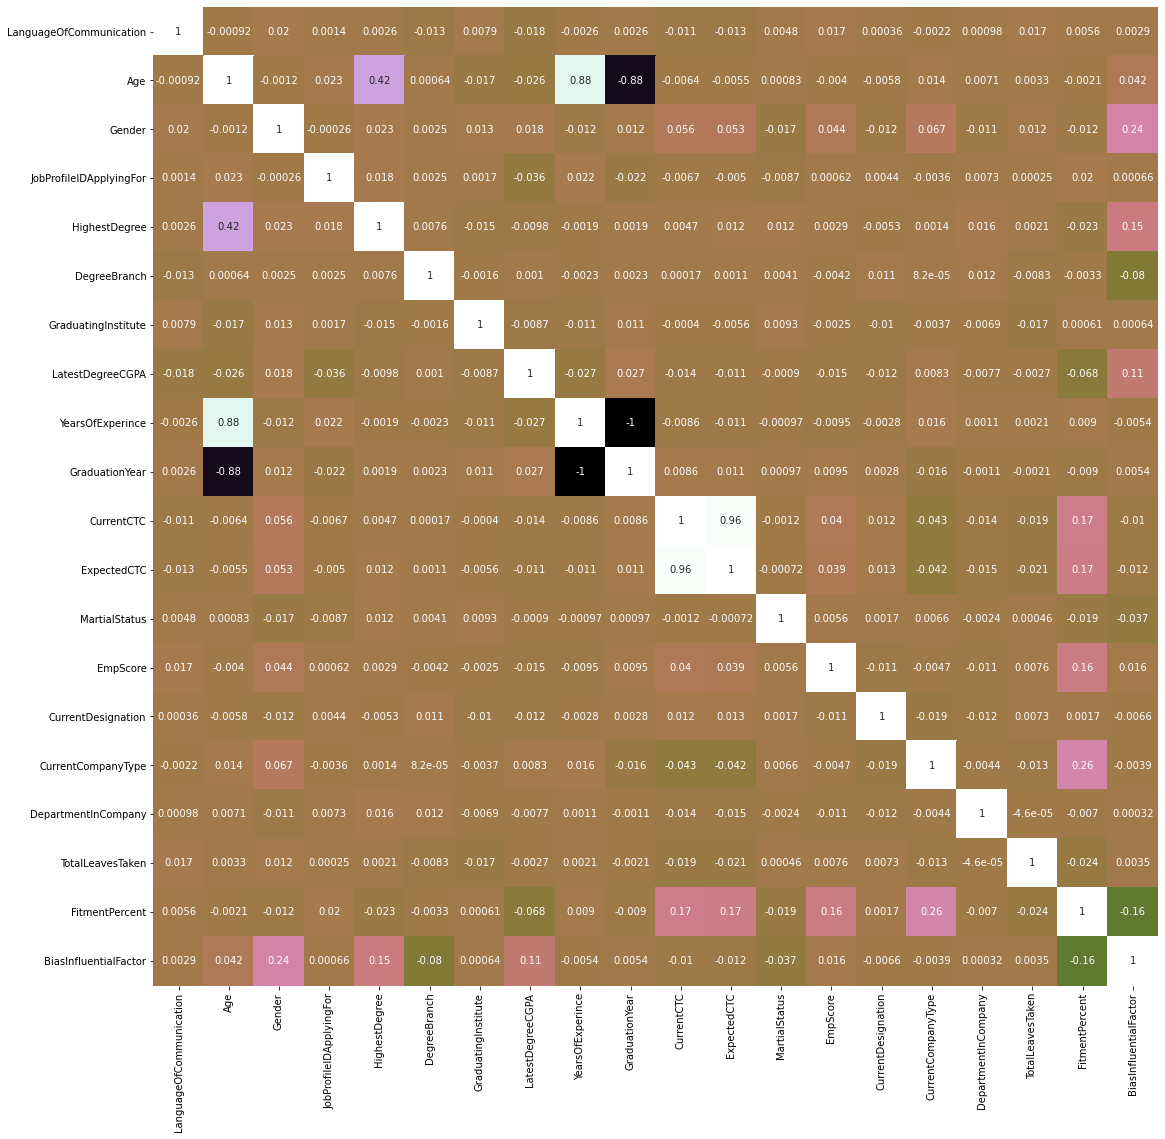

In [274]:
plt.figure(1, figsize=(18,18))
sns.heatmap(c.corr(),cmap="cubehelix", annot=True, cbar=False)

#### Task:
1. CurrentCTC and ExpectedCTC are in high correlation so will make a new column RaiseExpection = ExpectedCTC - CurrentCTC
2. Age to experience ratio
3. CurrentCtc to Employee Score
4. Age to Experience ratio
5. Convert Garduation Year to Graduation Age.

In [421]:
#assuming 260 working days in a year
current_year = 2021

def data_prep_4_classification(data):
    data["RaiseExpection"] = data["ExpectedCTC"] - data["CurrentCTC"]
    data["ctc2empScore"] = data["CurrentCTC"] / data["EmpScore"]
    data["Age2ExperienceRatio"] = data["Age"] / data["YearsOfExperince"]
    data["GraduationAge"] = current_year - data['GraduationYear']
    
    
    columns_to_drop = ["ExpectedCTC", "GraduationYear" , "LanguageOfCommunication",
                       "JobProfileIDApplyingFor","DepartmentInCompany"]
    data.drop(columns_to_drop, axis =1, inplace=True)
    return data
    

In [422]:
x_train_classifier = data_prep_4_classification(x_train_classifier)
test_data_copy = data_prep_4_classification(test_data_copy)

In [463]:
x_train_classifier.shape

(10309, 18)

In [423]:
x_train_classifier = x_train_classifier.drop(["FitmentPercent"], axis = 1)
x_train_classifier['EmpID'] = x_train_classifier['EmpID'].astype('int32')
test_data_copy['EmpID'] = test_data_copy['EmpID'].astype('int32')



In [363]:
test_data_copy.shape

(8745, 24)

### 5.3 Train test split

In [310]:
x_train_classifier.shape 

(10309, 20)

In [290]:
y_train_classifier.shape

(10309,)

In [424]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_classifier,
                                    y_train_classifier,
                                    stratify=y_train_classifier,
                                    test_size=0.15, random_state=0)

In [425]:
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(8762,) (1547,)
(8762, 18) (1547, 18)


### 5.4 Training the model

In [449]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

xgb_params= {"base_score":0.5, "booster":'gbtree', "colsample_bylevel":1,
              "colsample_bynode":1, 'colsample_bytree':1, "gamma":1, "gpu_id":-1,
              "importance_type":'gain', "interaction_constraints":'',
              "learning_rate":0.20000012, "max_delta_step":0, "max_depth":8,
              "min_child_weight":1,  "monotone_constraints":'()',
              "n_estimators":25, "n_jobs":8, "num_parallel_tree":1,
              "objective":'multi:softprob', "random_state":0, "reg_alpha":1,
              "reg_lambda":0, "scale_pos_weight":None, "subsample":1,
              "tree_method":'exact', "validate_parameters":1, "verbosity":None}

xgb_classifier = XGBClassifier()

In [450]:
scored_accuracy = []
scored_f1 = []
loop = []

def cross_val(X,Y,model,params, folds):
    
    kfold = StratifiedKFold( n_splits = folds)

    for fold, (train_idx, test_idx) in enumerate(kfold.split(X,Y)):
        print("fold :", fold)
        
        x_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]    #for dataframe
        x_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]        #for dataframe
        
        alg = model(**params)
        alg.fit(x_train, y_train, eval_set = [(x_test, y_test)],early_stopping_rounds=100,verbose=0)
        
        pred = alg.predict(x_test)
        accuracy = accuracy_score(y_test, pred)
        f1 = f1_score(y_test, pred, average = "weighted")
        
        print(f"accuracy: {accuracy}")
        print(f"f1_score: {f1}")
        scored_accuracy.append(accuracy)
        scored_f1.append(f1)
        loop.append(fold)
        print("-"*50)
    
    return alg


In [451]:
xgb_model = cross_val(X_train, y_train, XGBClassifier,xgb_params, folds = 100)

fold : 0
[19:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.875
f1_score: 0.8649608468757406
--------------------------------------------------
fold : 1
[19:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8761724386724388
--------------------------------------------------
fold : 2
[19:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8813002473716758
--------------------------------------------------
fold : 3
[19:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8601948927083698
--------------------------------------------------
fold : 4
[19:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.8844691157095249
--------------------------------------------------
fold : 5
[19:50:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.9057830397116112
--------------------------------------------------
fold : 6
[19:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.897027972027972
--------------------------------------------------
fold : 7
[19:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9201536643026006
--------------------------------------------------
fold : 8
[19:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9431818181818182
f1_score: 0.9281565656565657
--------------------------------------------------
fold : 9
[19:50:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.9075751763155856
--------------------------------------------------
fold : 10
[19:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.875
f1_score: 0.8634708094935367
--------------------------------------------------
fold : 11
[19:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9320393787499051
--------------------------------------------------
fold : 12
[19:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.920425849403122
--------------------------------------------------
fold : 13
[19:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8624716085726988
--------------------------------------------------
fold : 14
[19:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.9046278511404562
--------------------------------------------------
fold : 15
[19:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9167179498061852
--------------------------------------------------
fold : 16
[19:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.8888148008203582
--------------------------------------------------
fold : 17
[19:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9322032380543018
--------------------------------------------------
fold : 18
[19:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8813113293632774
--------------------------------------------------
fold : 19
[19:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8522727272727273
f1_score: 0.8390764790764791
--------------------------------------------------
fold : 20
[19:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8933599970953995
--------------------------------------------------
fold : 21
[19:50:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8701397964807183
--------------------------------------------------
fold : 22
[19:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8894574083076757
--------------------------------------------------
fold : 23
[19:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9282890176272528
--------------------------------------------------
fold : 24
[19:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8964466089466089
--------------------------------------------------
fold : 25
[19:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.8932153204851414
--------------------------------------------------
fold : 26
[19:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8653400095215953
--------------------------------------------------
fold : 27
[19:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9129732551637774
--------------------------------------------------
fold : 28
[19:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8636363636363636
f1_score: 0.8298625712911427
--------------------------------------------------
fold : 29
[19:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8794552669552669
--------------------------------------------------
fold : 30
[19:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8731022903579294
--------------------------------------------------
fold : 31
[19:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.9007206417920703
--------------------------------------------------
fold : 32
[19:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.875
f1_score: 0.8637389822634968
--------------------------------------------------
fold : 33
[19:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8522727272727273
f1_score: 0.8272867623006384
--------------------------------------------------
fold : 34
[19:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.924025443715966
--------------------------------------------------
fold : 35
[19:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.908882189239332
--------------------------------------------------
fold : 36
[19:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9237030562030561
--------------------------------------------------
fold : 37
[19:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9287954264845021
--------------------------------------------------
fold : 38
[19:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.8901772830344258
--------------------------------------------------
fold : 39
[19:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.884644660894661
--------------------------------------------------
fold : 40
[19:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8636363636363636
f1_score: 0.8505133839480343
--------------------------------------------------
fold : 41
[19:50:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.8920921952443692
--------------------------------------------------
fold : 42
[19:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.9017953427044336
--------------------------------------------------
fold : 43
[19:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.86583883952305
--------------------------------------------------
fold : 44
[19:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8794317692386002
--------------------------------------------------
fold : 45
[19:50:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.919700053134182
--------------------------------------------------
fold : 46
[19:50:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.875
f1_score: 0.8656482351640453
--------------------------------------------------
fold : 47
[19:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.8953868649081415
--------------------------------------------------
fold : 48
[19:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9163256083932776
--------------------------------------------------
fold : 49
[19:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.9060121537319968
--------------------------------------------------
fold : 50
[19:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.9079023315865421
--------------------------------------------------
fold : 51
[19:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9284012660208834
--------------------------------------------------
fold : 52
[19:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8693046379796864
--------------------------------------------------
fold : 53
[19:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9313412749582962
--------------------------------------------------
fold : 54
[19:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9318181818181818
f1_score: 0.9273904877628283
--------------------------------------------------
fold : 55
[19:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8840713499308123
--------------------------------------------------
fold : 56
[19:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.9054028379028378
--------------------------------------------------
fold : 57
[19:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8863636363636364
f1_score: 0.8664534672669841
--------------------------------------------------
fold : 58
[19:51:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8409090909090909
f1_score: 0.828835676734613
--------------------------------------------------
fold : 59
[19:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8977272727272727
f1_score: 0.8900323034561556
--------------------------------------------------
fold : 60
[19:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9204545454545454
f1_score: 0.9031606722219372
--------------------------------------------------
fold : 61
[19:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9090909090909091
f1_score: 0.8939436196746904
--------------------------------------------------
fold : 62
[19:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.9008253975813009
--------------------------------------------------
fold : 63
[19:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9195402298850575
f1_score: 0.9079332882578318
--------------------------------------------------
fold : 64
[19:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9425287356321839
f1_score: 0.9325652970798483
--------------------------------------------------
fold : 65
[19:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9310344827586207
f1_score: 0.9179374729947902
--------------------------------------------------
fold : 66
[19:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8866586182780303
--------------------------------------------------
fold : 67
[19:51:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8862605734169953
--------------------------------------------------
fold : 68
[19:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9310344827586207
f1_score: 0.9303223808970935
--------------------------------------------------
fold : 69
[19:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8883198464192851
--------------------------------------------------
fold : 70
[19:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9195402298850575
f1_score: 0.9176193363237772
--------------------------------------------------
fold : 71
[19:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9655172413793104
f1_score: 0.9621508116711642
--------------------------------------------------
fold : 72
[19:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8922757957240717
--------------------------------------------------
fold : 73
[19:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8919463231612039
--------------------------------------------------
fold : 74
[19:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.9029455537497342
--------------------------------------------------
fold : 75
[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9195402298850575
f1_score: 0.9053100245632059
--------------------------------------------------
fold : 76
[19:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9195402298850575
f1_score: 0.9092444659129402
--------------------------------------------------
fold : 77
[19:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8892186637498192
--------------------------------------------------
fold : 78
[19:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8953582595675341
--------------------------------------------------
fold : 79
[19:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9540229885057471
f1_score: 0.9500242035844824
--------------------------------------------------
fold : 80
[19:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8850574712643678
f1_score: 0.8745573822035592
--------------------------------------------------
fold : 81
[19:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9310344827586207
f1_score: 0.9165211729647159
--------------------------------------------------
fold : 82
[19:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9195402298850575
f1_score: 0.9164137267585543
--------------------------------------------------
fold : 83
[19:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8745019157088124
--------------------------------------------------
fold : 84
[19:51:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8505747126436781
f1_score: 0.8349090749272237
--------------------------------------------------
fold : 85
[19:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8786493120657953
--------------------------------------------------
fold : 86
[19:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8620689655172413
f1_score: 0.8490919056573378
--------------------------------------------------
fold : 87
[19:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8888813855973133
--------------------------------------------------
fold : 88
[19:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8745019591489213
--------------------------------------------------
fold : 89
[19:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8795238279116719
--------------------------------------------------
fold : 90
[19:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9425287356321839
f1_score: 0.9301637060257749
--------------------------------------------------
fold : 91
[19:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8807598978288634
--------------------------------------------------
fold : 92
[19:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9310344827586207
f1_score: 0.9315974507910455
--------------------------------------------------
fold : 93
[19:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9195402298850575
f1_score: 0.9125158114722542
--------------------------------------------------
fold : 94
[19:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.8985880020362779
--------------------------------------------------
fold : 95
[19:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.9080459770114943
f1_score: 0.9041447289823101
--------------------------------------------------
fold : 96
[19:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8857942004054661
--------------------------------------------------
fold : 97
[19:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8850574712643678
f1_score: 0.8799187841762612
--------------------------------------------------
fold : 98
[19:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.896551724137931
f1_score: 0.8893140463600363
--------------------------------------------------
fold : 99
[19:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\anand\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy: 0.8735632183908046
f1_score: 0.8557247520030835
--------------------------------------------------


### 5.5 Validating predictions

In [447]:
classification_test_pred = xgb_model.predict(X_test)  #new
accuracy = accuracy_score(y_test, classification_test_pred)
f1 = f1_score(y_test, classification_test_pred, average = "weighted")
#print(f"roc_auc_score: {roc_score}")
print(f"accuracy: {accuracy}")
print(f"f1_score: {f1}")
print("-"*50)

accuracy: 0.9101486748545572
f1_score: 0.8997776786859324
--------------------------------------------------


Text(0.5, 1.0, 'Predicte')

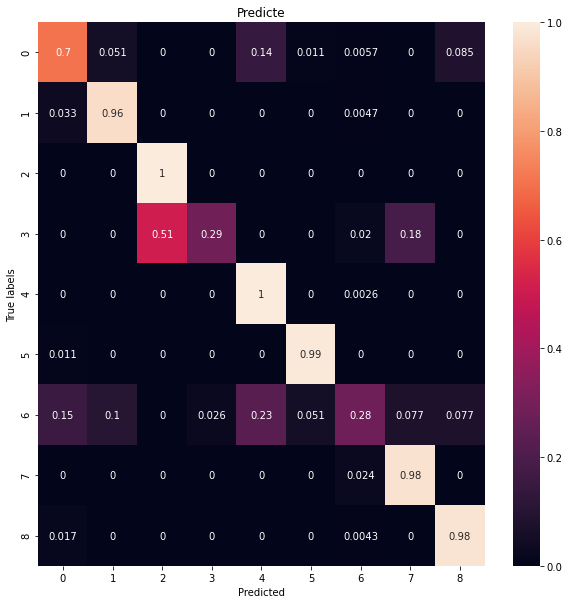

In [448]:
from sklearn.metrics import confusion_matrix
plt.figure(1, figsize=(10,10))
ax = plt.subplot()
cm = confusion_matrix(y_test, classification_test_pred, normalize = "true")
sns.heatmap(cm, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True labels")
ax.set_title("Predicte")

### 6. Imputing missing "BiasInfluentialFactor"

In [588]:
#test_data_copy.drop("EmpID", axis = 1, inplace = True)
prediction_missing_test = xgb_model.predict(test_data_copy) 

In [589]:
test_data_copy["BiasInfluentialFactor"] = prediction_missing_test
test_data_copy.head()

EmpID  Age  Gender  HighestDegree  DegreeBranch  GraduatingInstitute  \
0   5664   35       1              7             5                    1   
1  23568   35       1              0             5                    2   
2  21490   28       1              4             0                    1   
3   8363   37       1              6             1                    1   
4   6165   36       0              7             0                    1   

   LatestDegreeCGPA  YearsOfExperince  CurrentCTC  MartialStatus  EmpScore  \
0                 5                 5          27              1         4   
1                 9                12          29              0         4   
2                 9                 2          18              0         3   
3                 8                11           7              1         5   
4                 7                 6          22              0         4   

   CurrentDesignation  CurrentCompanyType  TotalLeavesTaken  RaiseExpection  \
0                   5                   0                18               7   
1                   4                   0                 8               4   
2                   5                   2                18               7   
3                   3                   0                17               5   
4                   5                   2                 9              10   

   ctc2empScore  Age2ExperienceRatio  GraduationAge BiasInfluentialFactor  
0          6.75             7.000000              5          DegreeBranch  
1          7.25             2.916667             12          DegreeBranch  
2          6.00            14.000000              2         MartialStatus  
3          1.40             3.363636             11    CurrentCompanyType  
4          5.50             6.000000              6                Gender

In [590]:
prediction_missing_test.shape

(8745,)

In [591]:
test_data_copy.shape

(8745, 19)

In [523]:
temp = train_data[train_data.isnull().any(axis=1)]
temp["BiasInfluentialFactor"] = prediction_missing_test
temp1 = train_data.copy()
temp1.dropna(inplace=True)
new_train = pd.concat([temp1,temp])
new_train.name =new_train

<ipython-input-523-3e2e245e4617>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["BiasInfluentialFactor"] = prediction_missing_test
<ipython-input-523-3e2e245e4617>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_train.name =new_train


In [494]:
train_data.shape

(13645, 21)

In [495]:
new_train.shape

(13645, 21)

### 7 FitmentPercent prediction
#### 7.1 EDA

In [506]:
display_dataFrame_info(new_train)

Information of        EmpID  LanguageOfCommunication  Age  Gender  JobProfileIDApplyingFor  \
0      11041                        0   35       1                        3   
2      18638                        0   36       0                        4   
3       3941                        0   29       0                        4   
4       5936                        0   25       1                        0   
5       9670                        2   35       1                        7   
...      ...                      ...  ...     ...                      ...   
13630  21423                        1   40       1                        4   
13631  11425                        0   33       1                        3   
13633  13514                        0   32       2                        6   
13635  12644                        0   35       1                        3   
13641  17071                        2   29       2                        4   

       HighestDegree  DegreeBranch  

LanguageOfCommunication           Age        Gender  \
count             13645.000000  13645.000000  13645.000000   
mean                  0.552364     30.691242      0.752070   
std                   0.672895      3.881378      0.569828   
min                   0.000000     24.000000      0.000000   
25%                   0.000000     28.000000      0.000000   
50%                   0.000000     31.000000      1.000000   
75%                   1.000000     34.000000      1.000000   
max                   2.000000     42.000000      2.000000   

       JobProfileIDApplyingFor  HighestDegree  DegreeBranch  \
count             13645.000000   13645.000000  13645.000000   
mean                  4.141151       2.124661      2.295053   
std                   1.945199       2.341282      1.830115   
min                   0.000000       0.000000      0.000000   
25%                   3.000000       0.000000      1.000000   
50%                   4.000000       1.000000      2.000000   
75%                   6.000000       4.000000      4.000000   
max                   8.000000       7.000000      5.000000   

       GraduatingInstitute  LatestDegreeCGPA  YearsOfExperince  \
count         13645.000000      13645.000000      13645.000000   
mean              0.851008          7.100257          6.547746   
std               0.728956          1.346539          3.426920   
min               0.000000          4.000000          1.000000   
25%               0.000000          6.000000          4.000000   
50%               1.000000          7.000000          7.000000   
75%               1.000000          8.000000          9.000000   
max               2.000000         10.000000         12.000000   

       GraduationYear    CurrentCTC   ExpectedCTC  MartialStatus  \
count    13645.000000  13645.000000  13645.000000   13645.000000   
mean      2014.452254     18.076951     25.061488       0.281055   
std          3.426920      7.208130      7.478119       0.449531   
min       2009.000000      6.000000     10.000000       0.000000   
25%       2012.000000     12.000000     19.000000       0.000000   
50%       2014.000000     18.000000     25.000000       0.000000   
75%       2017.000000     24.000000     31.000000       1.000000   
max       2020.000000     30.000000     40.000000       1.000000   

           EmpScore  CurrentDesignation  CurrentCompanyType  \
count  13645.000000        13645.000000        13645.000000   
mean       3.425431            4.333089            1.144962   
std        0.973328            2.131026            0.876468   
min        1.500000            0.000000            0.000000   
25%        3.000000            3.000000            0.000000   
50%        3.000000            5.000000            1.000000   
75%        4.000000            5.000000            2.000000   
max        5.000000            7.000000            2.000000   

       DepartmentInCompany  TotalLeavesTaken  BiasInfluentialFactor  \
count         13645.000000      13645.000000           13645.000000   
mean              1.679883         11.967021               2.274679   
std               1.045145          4.897836               2.158830   
min               0.000000          4.000000               0.000000   
25%               1.000000          8.000000               0.000000   
50%               2.000000         12.000000               2.000000   
75%               2.000000         16.000000               3.000000   
max               4.000000         20.000000               8.000000   

       FitmentPercent  
count    13645.000000  
mean        75.880093  
std         14.894207  
min         33.530000  
25%         68.720000  
50%         78.110000  
75%         87.990000  
max         95.500000

EmpID
count   13645
unique  13645
top     24390
freq        1

EmpID LanguageOfCommunication    Age Gender  \
column type      object                   int32  int64  int32   
null values           0                       0      0      0   
null values (%)       0                       0      0      0   

                JobProfileIDApplyingFor HighestDegree DegreeBranch  \
column type                       int32         int32        int32   
null values                           0             0            0   
null values (%)                       0             0            0   

                GraduatingInstitute LatestDegreeCGPA YearsOfExperince  ...  \
column type                   int32            int64            int64  ...   
null values                       0                0                0  ...   
null values (%)                   0                0                0  ...   

                CurrentCTC ExpectedCTC MartialStatus EmpScore  \
column type          int64       int64         int32  float64   
null values              0           0             0        0   
null values (%)          0           0             0        0   

                CurrentDesignation CurrentCompanyType DepartmentInCompany  \
column type                  int32              int32               int32   
null values                      0                  0                   0   
null values (%)                  0                  0                   0   

                TotalLeavesTaken BiasInfluentialFactor FitmentPercent  
column type                int64                 int64        float64  
null values                    0                     0              0  
null values (%)                0                     0              0  

[3 rows x 21 columns]

No of Unique Values in EmpID Column are : 13645
24390    1
9423     1
9420     1
9419     1
9418     1
        ..
16848    1
16846    1
16843    1
16841    1
2001     1
Name: EmpID, Length: 13645, dtype: int64



C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='TotalLeavesTaken', ylabel='Density'>

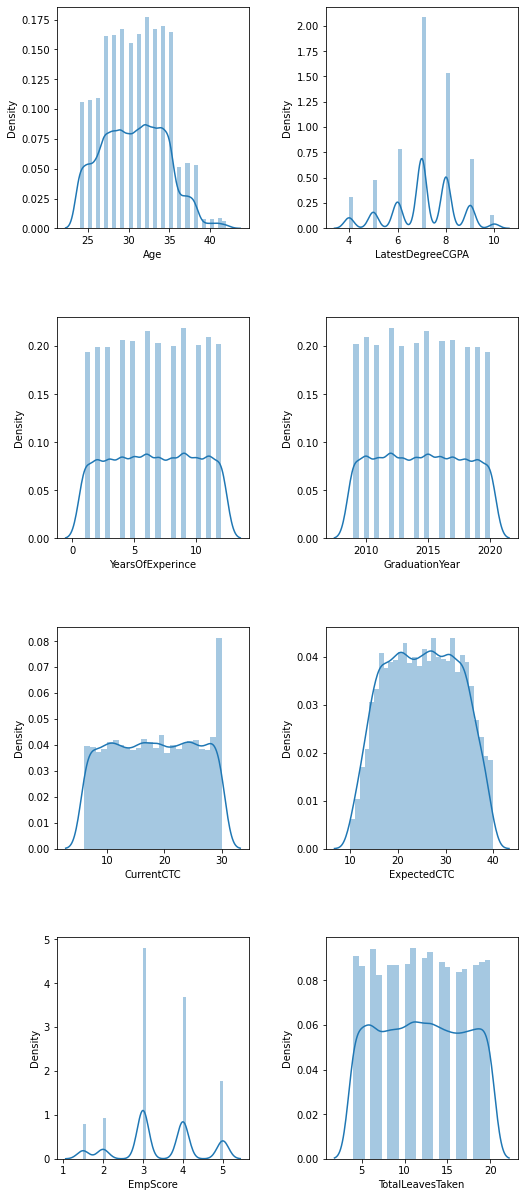

In [507]:
fig,axes = plt.subplots(4,2, figsize=(8,20)) #subplots(no of rows, no of columns)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
sns.distplot(train['Age'], ax= axes[0,0])
sns.distplot(train['LatestDegreeCGPA'], ax= axes[0,1])
sns.distplot(train['YearsOfExperince'], ax= axes[1,0])
sns.distplot(train['GraduationYear'], ax= axes[1,1])
sns.distplot(train['CurrentCTC'], ax= axes[2,0])
sns.distplot(train['ExpectedCTC'], ax= axes[2,1])
sns.distplot(train['EmpScore'], ax= axes[3,0])
sns.distplot(train['TotalLeavesTaken'], ax= axes[3,1])

<function matplotlib.pyplot.show(close=None, block=None)>

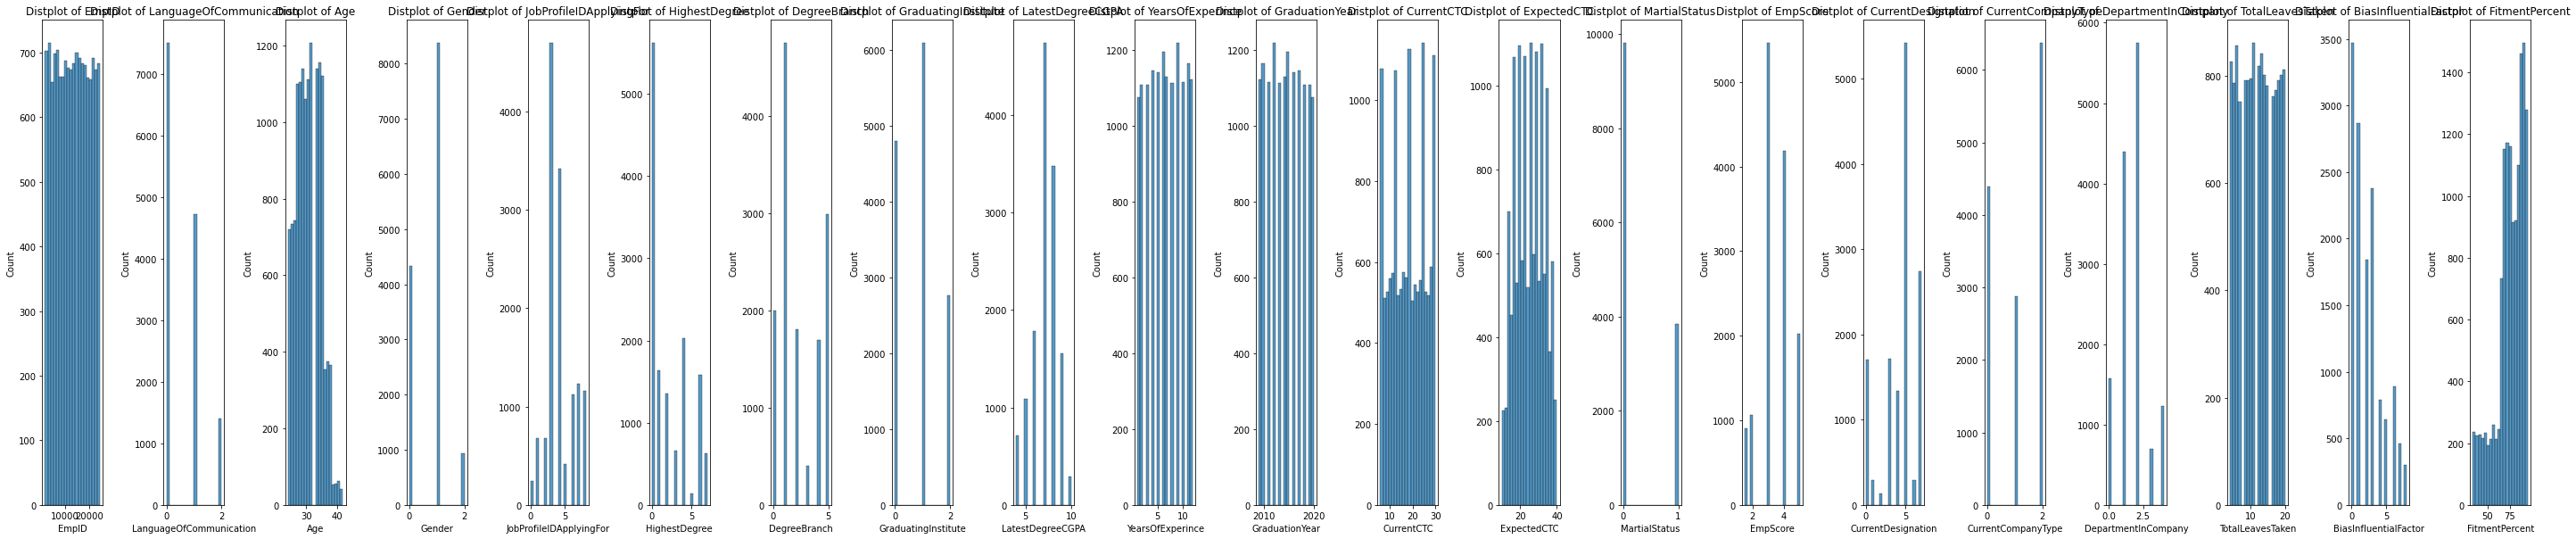

In [524]:
bias_labeler(new_train)
plt.figure(1, figsize=(50,10))
n=0
for x in new_train.columns:
    n += 1
    plt.subplot(1,new_train.shape[1],n)
    plt.subplots_adjust(hspace  = 1, wspace = 1)
    sns.histplot(new_train[x], bins =20)
    plt.title('Distplot of {}'.format(x))
plt.show

### 7.2 Feature Engineering and feature selection

In [525]:

def data_prep_4_prediction(data):
    data["RaiseExpection"] = data["ExpectedCTC"] - data["CurrentCTC"]
    data["RaiseExpection"] = data["ExpectedCTC"] - data["CurrentCTC"]
    data["ctc2empScore"] = data["CurrentCTC"] / data["EmpScore"]
    data["Age2ExperienceRatio"] = data["Age"] / data["YearsOfExperince"]
    data["GraduationAge"] = current_year - data['GraduationYear']
    
    
    columns_to_drop = ["ExpectedCTC", "GraduationYear" , "GraduatingInstitute",
                       "LanguageOfCommunication", "TotalLeavesTaken",
                       "JobProfileIDApplyingFor"]
    data.drop(columns_to_drop, axis =1, inplace=True)
    return data

new_train = data_prep_4_prediction(new_train)

In [526]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
x_train_reg = new_train.drop("FitmentPercent", axis=1)
y_train_reg = new_train["FitmentPercent"]

mutual_info = mutual_info_regression(x_train_reg, y_train_reg)
mutual_info = pd.Series(mutual_info)
mutual_info.index = (new_train.drop("FitmentPercent", axis=1)).columns
mutual_info.sort_values(ascending=False)

BiasInfluentialFactor    0.241783
Gender                   0.160229
CurrentCompanyType       0.114481
ctc2empScore             0.058421
EmpScore                 0.031788
CurrentCTC               0.029293
Age                      0.010657
LatestDegreeCGPA         0.009968
HighestDegree            0.009373
YearsOfExperince         0.007741
GraduationAge            0.007683
MartialStatus            0.005035
CurrentDesignation       0.003074
DepartmentInCompany      0.002248
EmpID                    0.001889
RaiseExpection           0.001478
Age2ExperienceRatio      0.000000
DegreeBranch             0.000000
dtype: float64

<AxesSubplot:>

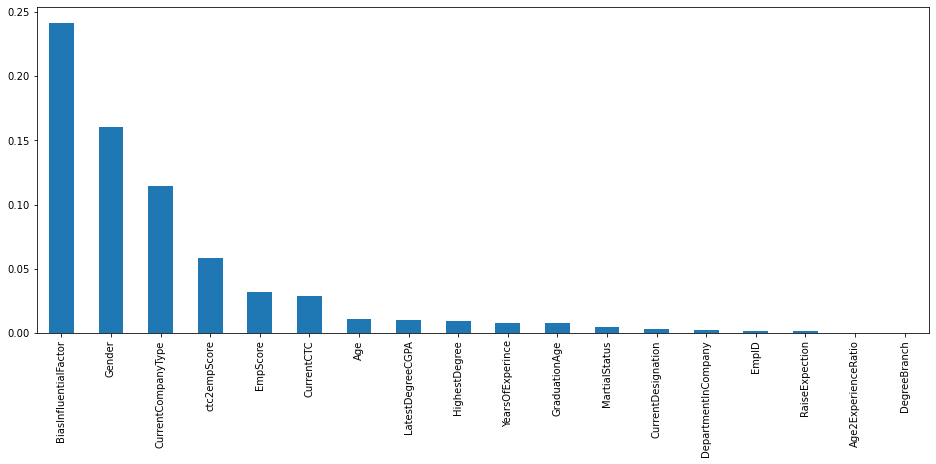

In [527]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(16, 6))

<AxesSubplot:>

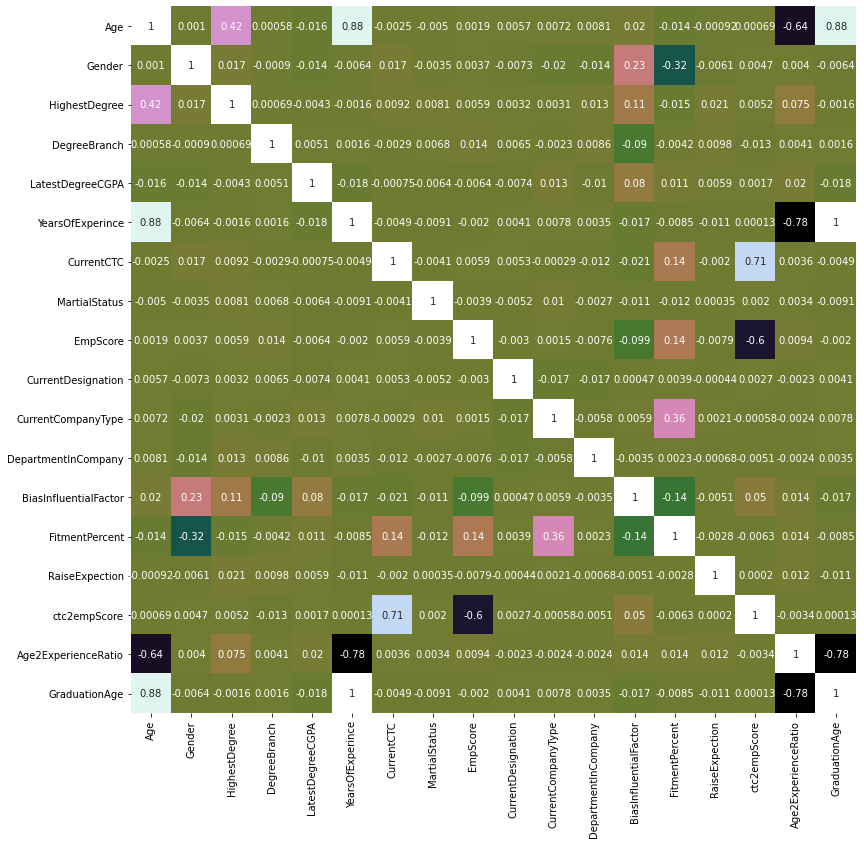

In [528]:
plt.figure(1, figsize=(13,13))
sns.heatmap(new_train.corr(),cmap="cubehelix", annot=True, cbar=False)

In [530]:
new_train['EmpID'] = new_train['EmpID'].astype('int64')
new_train.dtypes

EmpID                      int64
Age                        int64
Gender                     int32
HighestDegree              int32
DegreeBranch               int32
LatestDegreeCGPA           int64
YearsOfExperince           int64
CurrentCTC                 int64
MartialStatus              int32
EmpScore                 float64
CurrentDesignation         int32
CurrentCompanyType         int32
DepartmentInCompany        int32
BiasInfluentialFactor      int64
FitmentPercent           float64
RaiseExpection             int64
ctc2empScore             float64
Age2ExperienceRatio      float64
GraduationAge              int64
dtype: object

### 7.3 Train test split

In [532]:
X_train_reg = new_train.drop(["FitmentPercent"], axis=1)
y_train_reg = new_train["FitmentPercent"]

In [533]:
X_train, X_test, y_train, y_test = train_test_split( X_train_reg, y_train_reg,
                                                    test_size=0.20,random_state=0,
                                                    shuffle=True)
print(y_train.shape, y_test.shape)
print(X_train.shape, X_test.shape)

(10916,) (2729,)
(10916, 18) (2729, 18)


### 7.4 trying diffrent models

In [568]:
#linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_test_pred = lr_model.predict(X_test)  #new

m2e = mean_squared_error(y_test, lr_test_pred)
mAe = mean_absolute_error(y_test, lr_test_pred)
r2s = r2_score(y_test, lr_test_pred)

print(f"mean_squared_error: {m2e}")
print(f"mean_absolute_error: {mAe}")
print(f"r2_score: {r2s}")
print("-"*50)

mean_squared_error: 155.35423920111825
mean_absolute_error: 10.049781457576627
r2_score: 0.3012571671248302
--------------------------------------------------


In [570]:
# svm model
from sklearn import svm

svr_model = svm.SVR()
svr_model.fit(X_train, y_train)
svr_test_pred = svr_model.predict(X_test)

m2e = mean_squared_error(y_test, svr_test_pred)
mAe = mean_absolute_error(y_test, svr_test_pred)
r2s = r2_score(y_test, svr_test_pred)

print(f"mean_squared_error: {m2e}")
print(f"mean_absolute_error: {mAe}")
print(f"r2_score: {r2s}")
print("-"*50)

mean_squared_error: 229.48610233135344
mean_absolute_error: 11.775659731513116
r2_score: -0.03216861073808919
--------------------------------------------------


In [567]:
#randomForest model
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train)
rf_test_pred = rf_regressor.predict(X_test)  #new

m2e = mean_squared_error(y_test, rf_test_pred)
mAe = mean_absolute_error(y_test, rf_test_pred)
r2s = r2_score(y_test, rf_test_pred)

print(f"mean_squared_error: {m2e}")
print(f"mean_absolute_error: {mAe}")
print(f"r2_score: {r2s}")
print("-"*50)

mean_squared_error: 78.5549860874496
mean_absolute_error: 7.220165005496519
r2_score: 0.6466801691574375
--------------------------------------------------


##### XGBRegressor is chosen for final predictions

In [534]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [562]:
xgb_regressor = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.08, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=7,monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)


xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.08, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [563]:
test_pred = xgb_regressor.predict(X_test)  #new

m2e = mean_squared_error(y_test, test_pred)
mAe = mean_absolute_error(y_test, test_pred)
r2s = r2_score(y_test, test_pred)

print(f"mean_squared_error: {m2e}")
print(f"mean_absolute_error: {mAe}")
print(f"r2_score: {r2s}")
print("-"*50)

mean_squared_error: 77.28144672226918
mean_absolute_error: 7.218950151532245
r2_score: 0.6524082169299363
--------------------------------------------------


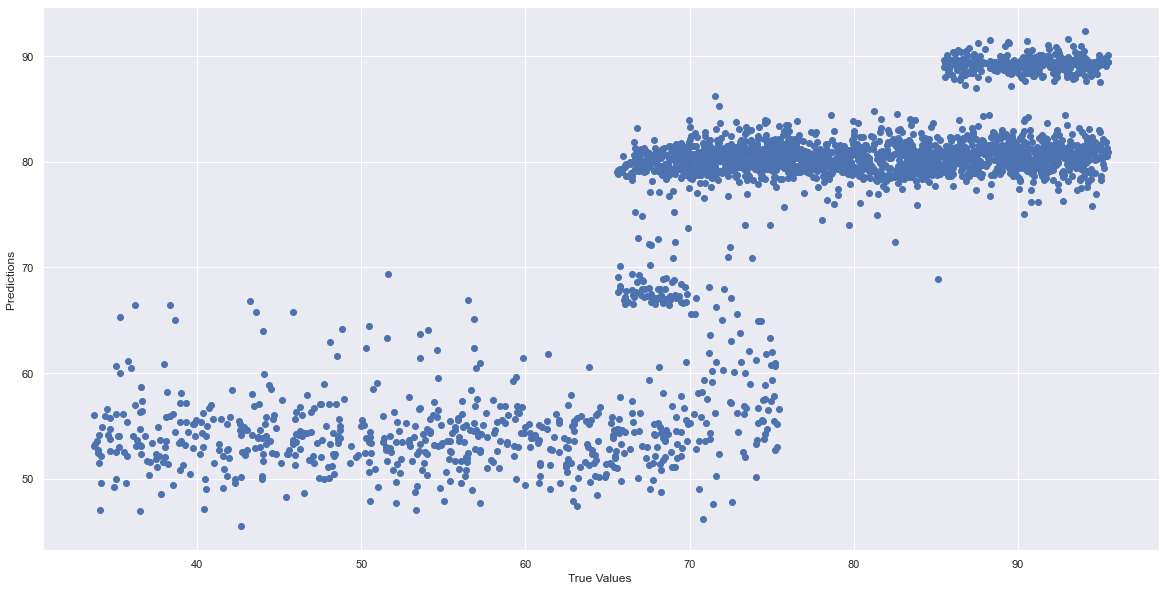

In [564]:
plt.rcParams['figure.figsize']=[20,10]
plt.scatter(y_test, test_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.grid(True)

<AxesSubplot:xlabel='FitmentPercent'>

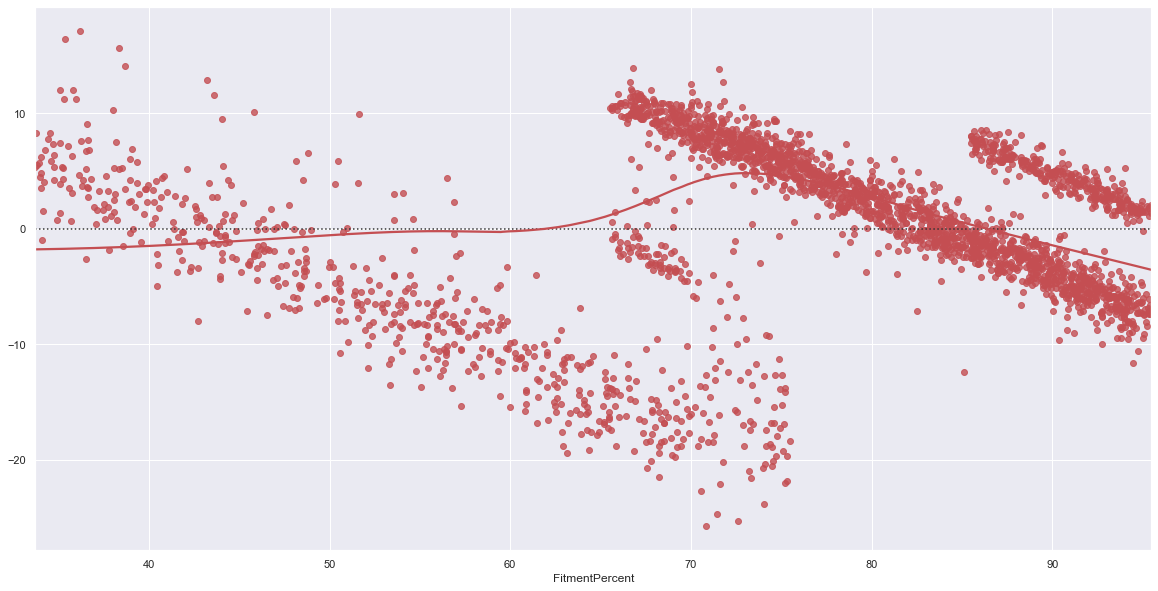

In [565]:
sns.residplot(x=y_test,  y=test_pred, lowess=True, color="r")

### 7.5 Final Prediction

In [595]:
t = test_data.copy()
t["BiasInfluentialFactor"] = prediction_missing_test # BiasInfluentialFactor cloumn

In [596]:
bias_labeler(t)
t = data_prep_4_prediction(t)

In [598]:
t.shape

(8745, 18)

In [600]:
fitment_test_pred = xgb_regressor.predict(t) #FitmentPercent cloumn
t["FitmentPercent"] = fitment_test_pred

In [602]:
bias_delabeler(t)

In [603]:
t.head()

EmpID  Age  Gender  HighestDegree  DegreeBranch  LatestDegreeCGPA  \
0   5664   35       1              7             5                 5   
1  23568   35       1              0             5                 9   
2  21490   28       1              4             0                 9   
3   8363   37       1              6             1                 8   
4   6165   36       0              7             0                 7   

   YearsOfExperince  CurrentCTC  MartialStatus  EmpScore  CurrentDesignation  \
0                 5          27              1         4                   5   
1                12          29              0         4                   4   
2                 2          18              0         3                   5   
3                11           7              1         5                   3   
4                 6          22              0         4                   5   

   CurrentCompanyType  DepartmentInCompany BiasInfluentialFactor  \
0                   0                    3          DegreeBranch   
1                   0                    2          DegreeBranch   
2                   2                    2         MartialStatus   
3                   0                    4    CurrentCompanyType   
4                   2                    2                Gender   

   RaiseExpection  ctc2empScore  Age2ExperienceRatio  GraduationAge  \
0               7          6.75             7.000000              5   
1               4          7.25             2.916667             12   
2               7          6.00            14.000000              2   
3               5          1.40             3.363636             11   
4              10          5.50             6.000000              6   

   FitmentPercent  
0       88.456818  
1       90.733551  
2       81.844177  
3       53.944984  
4       79.872902

In [607]:
submission

EmpID BiasInfluentialFactor  FitmentPercent
0   5664         MaritalStatus           25.14
1  23568          DegreeBranch           91.44
2  21490         MartialStatus           76.92
3   8363         HighestDegree           77.92
4   6165                Gender           85.64
5  17679                   NaN           41.23
6   9715                   NaN           50.00

In [606]:
final_submission = t[["EmpID","BiasInfluentialFactor", "FitmentPercent"]]
final_submission

EmpID BiasInfluentialFactor  FitmentPercent
0      5664          DegreeBranch       88.456818
1     23568          DegreeBranch       90.733551
2     21490         MartialStatus       81.844177
3      8363    CurrentCompanyType       53.944984
4      6165                Gender       79.872902
...     ...                   ...             ...
8740  14758                Gender       81.417892
8741  23544         HighestDegree       84.515526
8742  16175          DegreeBranch       80.133705
8743  18458    CurrentCompanyType       54.961891
8744  10036          DegreeBranch       51.714855

[8745 rows x 3 columns]

In [608]:
final_submission.to_csv("final_submission.csv",index=False)